In [ ]:
#Import libraries
import pandas as pd
from google.colab import files

#Upload file
uploaded = files.upload()

#Load dataset
file_name = "Dataset Clean.xlsx"
df = pd.read_excel("Dataset Clean.xlsx")

#Display first few rows of dataset
df.head()

Saving Dataset Clean.xlsx to Dataset Clean (9).xlsx


,Number,Biomass,TP,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g)
0,1.0,Waste sludge (paper),Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4
1,NaN,Waste sludge (paper),Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8
2,NaN,Waste sludge (paper),Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5
3,NaN,Waste sludge (Biological),Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6
4,NaN,Waste sludge (Biological),Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3


In [ ]:
#Check for missing data
missing_data = df.isnull().sum()

#Display columns with missing data
missing_data[missing_data > 0]

,0
Number,50
Biomass,1
PS,1
PV,1
C,3
H,4
N,6
O,3


In [ ]:
#Impute missing data with mean
df['PS'].fillna(df['PS'].mean(), inplace=True)
df['PV'].fillna(df['PV'].mean(), inplace=True)
df['C'].fillna(df['C'].mean(), inplace=True)
df['H'].fillna(df['H'].mean(), inplace=True)
df['O'].fillna(df['O'].mean(), inplace=True)

In [ ]:
#Check datatypes to identify numeric columns
df.dtypes

#Fix comma in 'N'
df['N'] = df['N'].str.replace(',', '.').astype(float)

#Make Qm float
df['Qm (mg/g)'] = df['Qm (mg/g)'].astype(float)

#Impute N
df['N'].fillna(df['N'].mean(), inplace=True)

#Drop rows with missing data
df_cleaned = df.dropna

#Print dataset column
print(df.columns)

#Check datatypes to identify numeric columns
df.dtypes

#Remove first column
df = df.iloc[:, 1:]

#Display the first few rows to confirm removal
df.head()

Index(['Number', 'Biomass', 'TP', 'TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C',
       'H', 'N', 'O', 'Qm (mg/g)'],
      dtype='object')


,Biomass,TP,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g)
0,Waste sludge (paper),Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,3.26,20.32,4.4
1,Waste sludge (paper),Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,3.26,20.41,3.8
2,Waste sludge (paper),Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,3.26,19.29,8.5
3,Waste sludge (Biological),Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,3.26,9.73,19.6
4,Waste sludge (Biological),Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,3.26,2.01,4.3


In [ ]:
#Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

#Display categorical columns
categorical_columns


Index(['Biomass', 'TP'], dtype='object')

In [ ]:
#Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#Display first few rows of the encoded dataset
df_encoded.head()

,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g),...,TP_Norfloxacin,TP_Oxytetracycline,TP_Oxytetracycline,TP_Salicylic acid,TP_Sulfadiazine,TP_Sulfamethoxazole,TP_Tetracycline,TP_Triclosan,TP_ibuprofen,TP_sulfamethazine
0,315,150.0,9.82,3.43,0.02,30.84,2.14,3.26,20.32,4.4,...,False,False,False,False,False,False,False,False,False,False
1,600,10.0,1.37,94.39,0.06,30.69,0.96,3.26,20.41,3.8,...,False,False,False,False,False,False,False,False,False,False
2,800,10.0,1.37,120.86,0.08,28.81,0.47,3.26,19.29,8.5,...,False,False,False,False,False,False,False,False,False,False
3,800,150.0,1.41,209.12,0.13,27.05,0.82,3.26,9.73,19.6,...,False,False,False,False,False,False,False,False,False,False
4,800,10.0,3.69,10.82,0.02,35.35,0.72,3.26,2.01,4.3,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Define x and y
X = df_encoded.drop('Qm (mg/g)', axis=1)
y = df_encoded['Qm (mg/g)']

#Display the first few rows of X and y
X.head(), y.head()

(   TemP  Time (min)    PS     BET    PV      C     H     N      O  \
 0   315       150.0  9.82    3.43  0.02  30.84  2.14  3.26  20.32   
 1   600        10.0  1.37   94.39  0.06  30.69  0.96  3.26  20.41   
 2   800        10.0  1.37  120.86  0.08  28.81  0.47  3.26  19.29   
 3   800       150.0  1.41  209.12  0.13  27.05  0.82  3.26   9.73   
 4   800        10.0  3.69   10.82  0.02  35.35  0.72  3.26   2.01   
 
    Biomass_Alfalfa  ...  TP_Norfloxacin  TP_Oxytetracycline  \
 0            False  ...           False               False   
 1            False  ...           False               False   
 2            False  ...           False               False   
 3            False  ...           False               False   
 4            False  ...           False               False   
 
    TP_Oxytetracycline   TP_Salicylic acid  TP_Sulfadiazine  \
 0                False              False            False   
 1                False              False            False   
 2 

In [ ]:
#Display summary stats
summary_statistics = df.describe()
print(summary_statistics)

encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

#Print encoded columns to verify
print("One-hot encoded columns:")
print(encoded_columns)

#Exclude one-hot encoded columns from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)


NameError: name 'df' is not defined

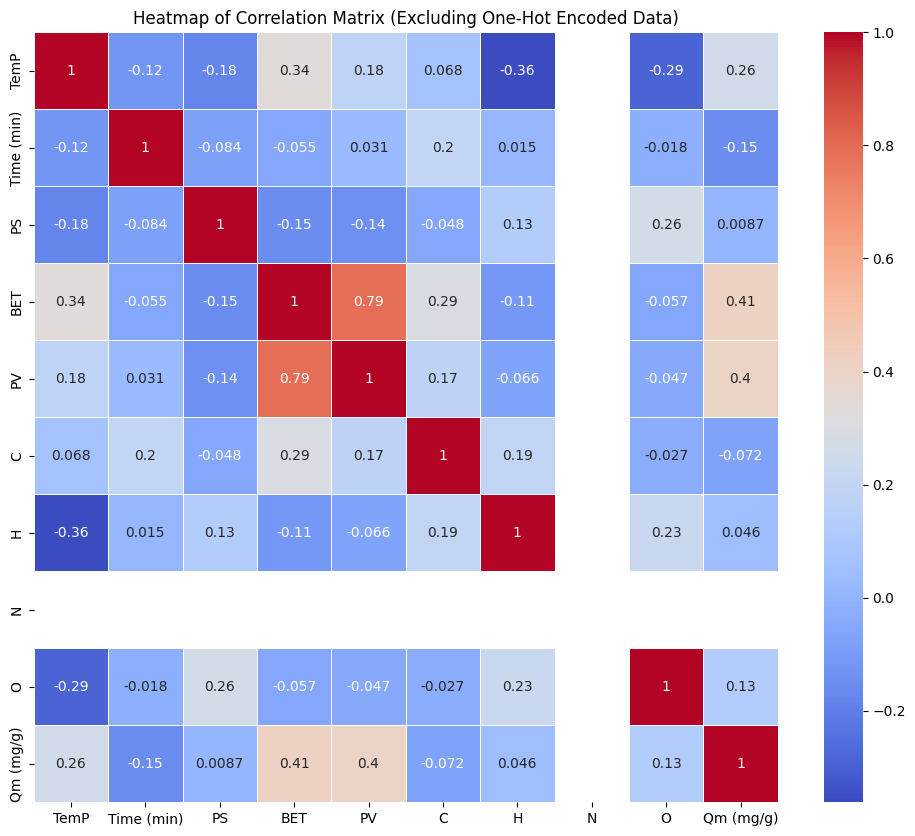

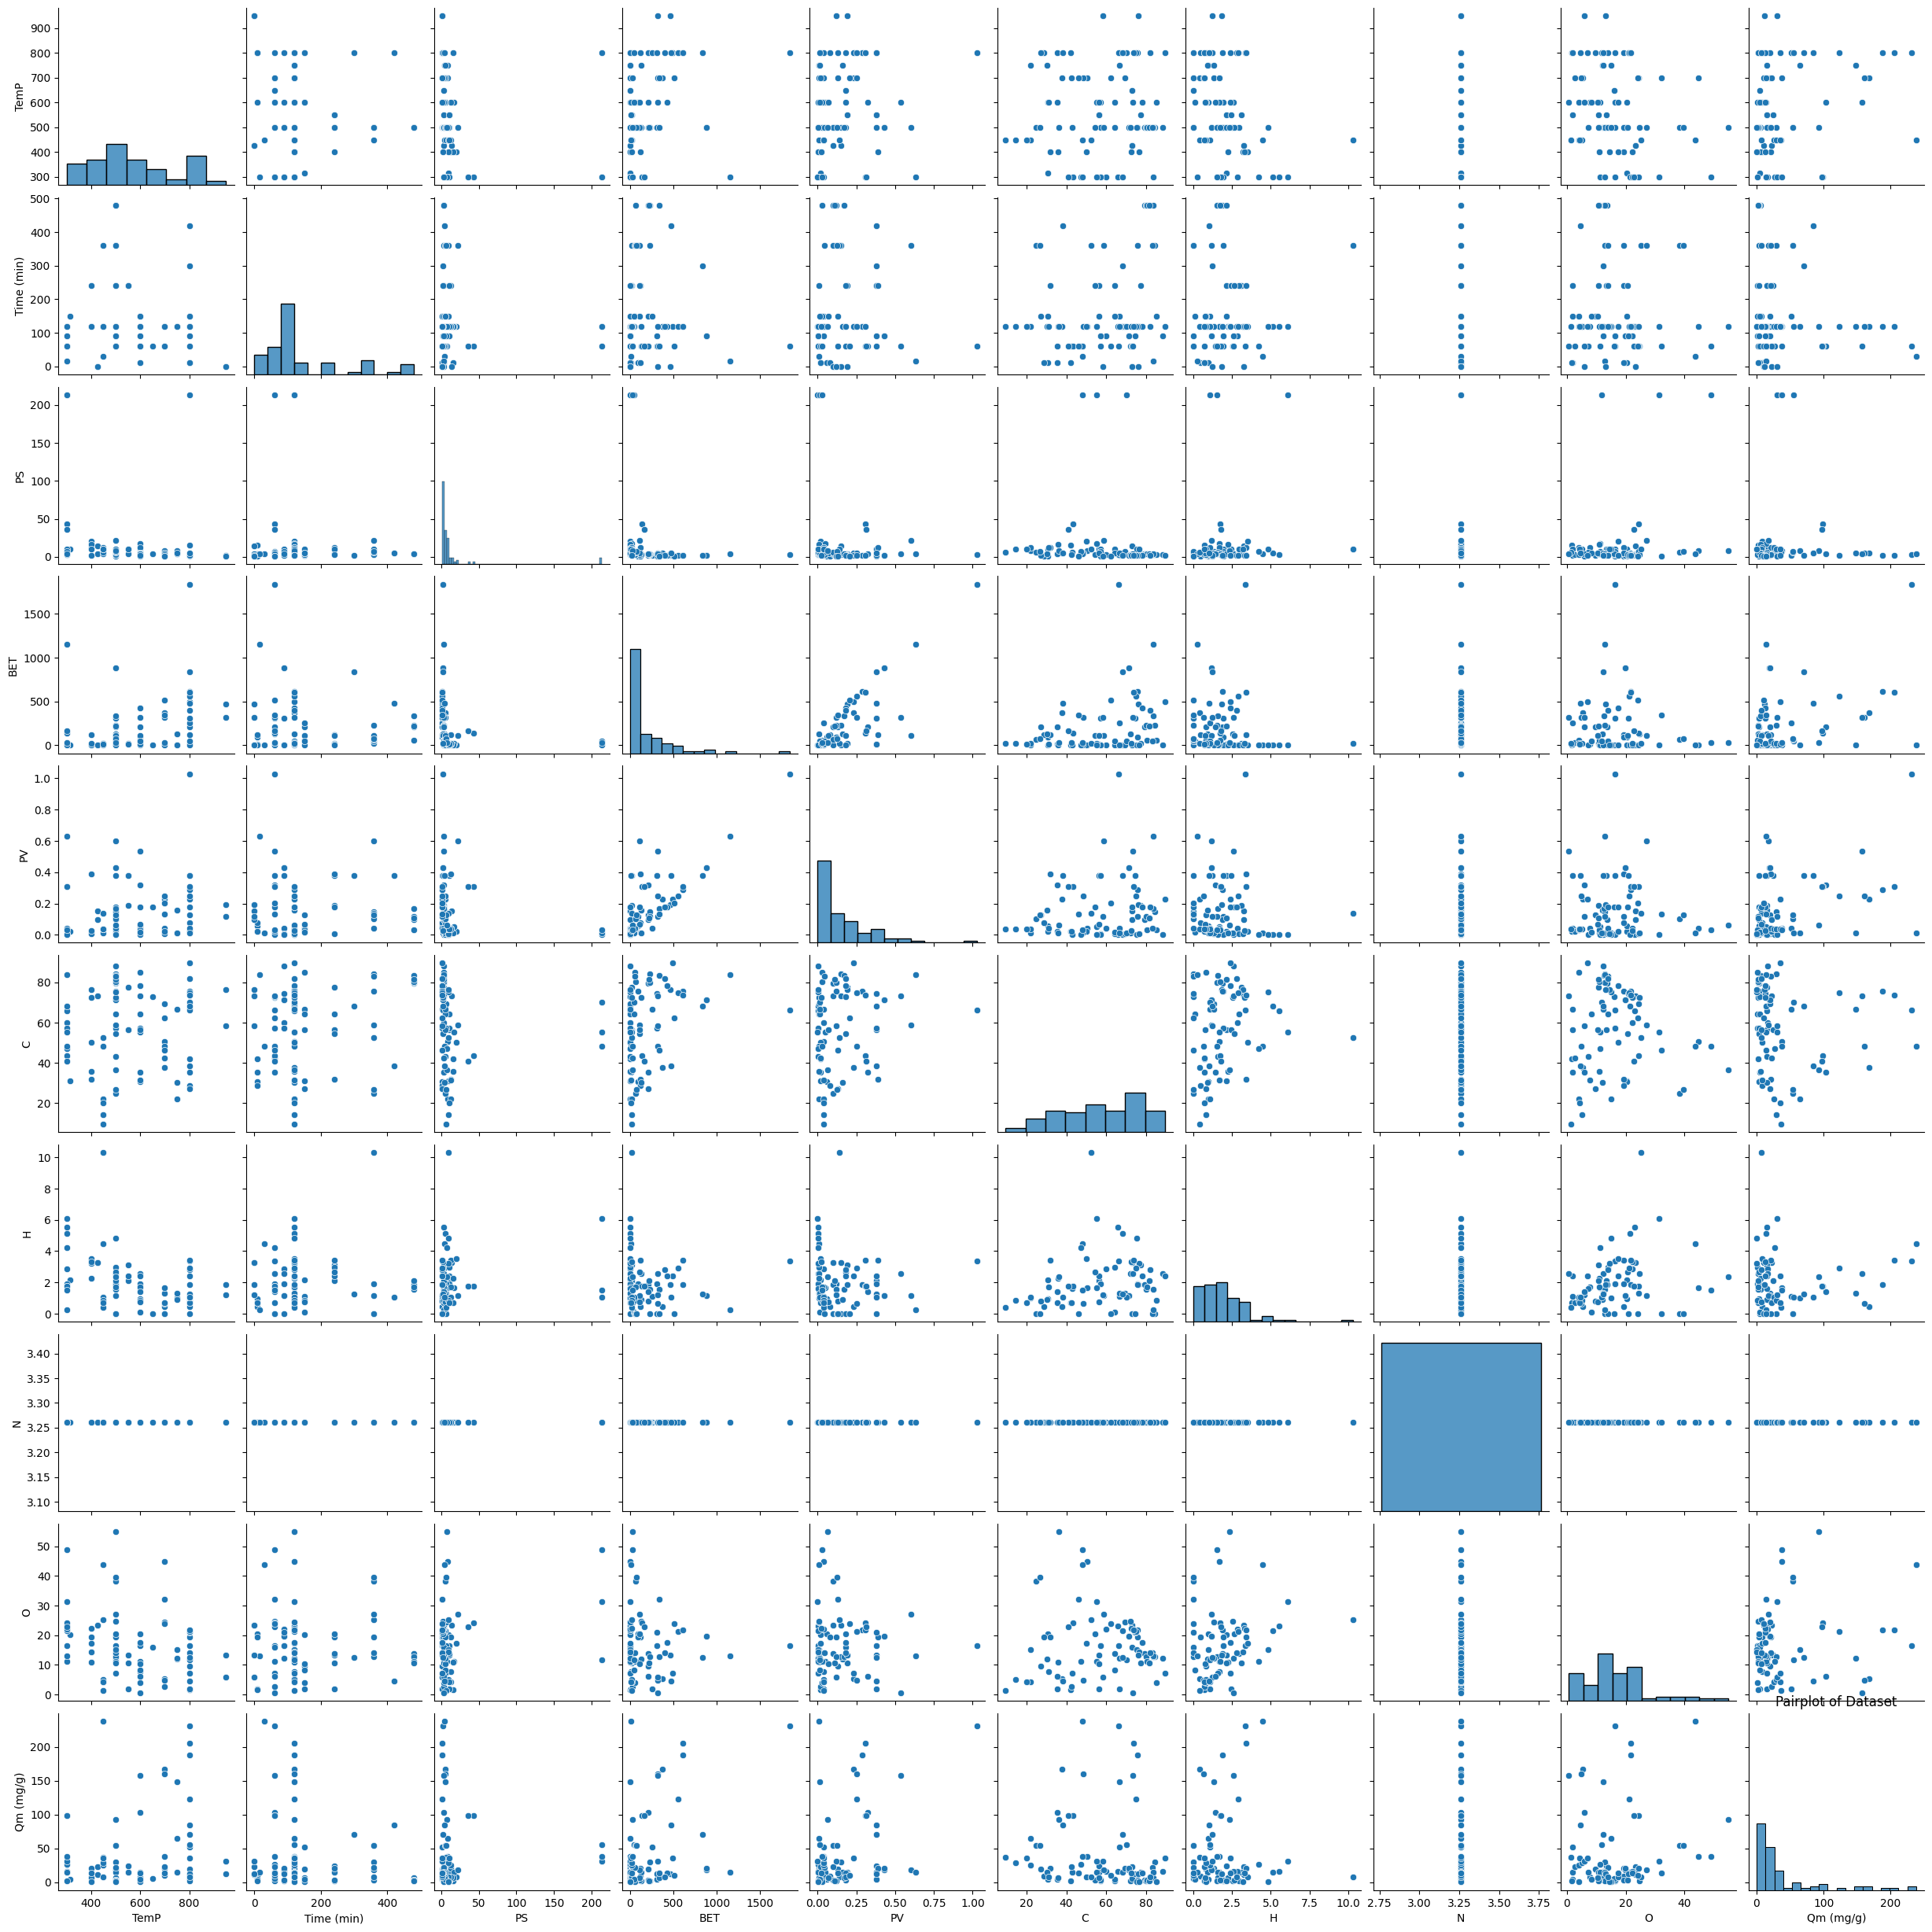

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize =(12,10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Excluding One-Hot Encoded Data)')
plt.show()


In [ ]:
#Plot a pairplot to visualize relationships between variables
sns.pairplot(df)
plt.title('Pairplot of Dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

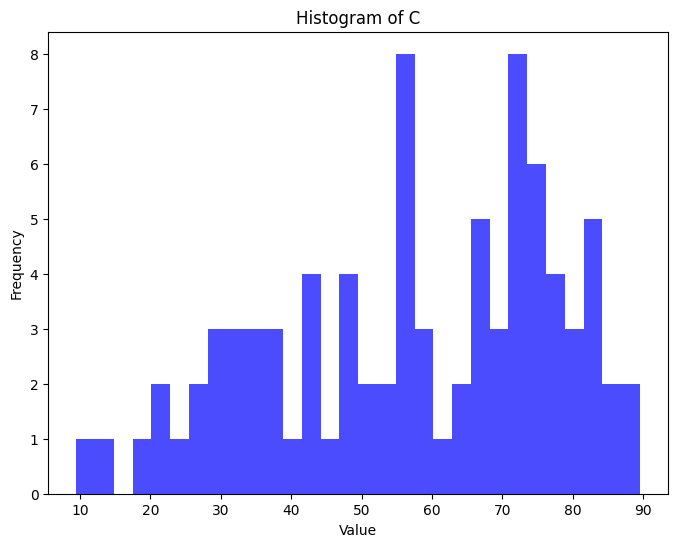

In [ ]:
#Plot a histogram for a specific numeric column
plt.figure(figsize=(8,6))
plt.hist(df['C'], bins=30, alpha=0.7, color='blue')
plt.title('Histogram of C')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show

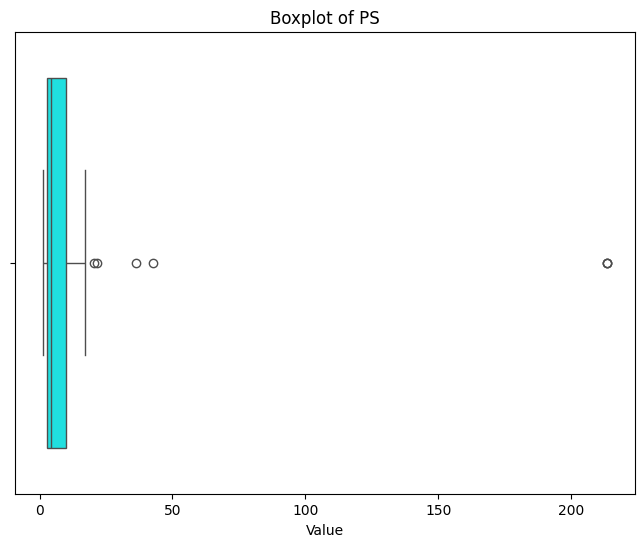

In [ ]:
#Plot a boxplot of a numeric column
plt.figure(figsize=(8,6))
sns.boxplot(x=df['PS'], color='cyan')
plt.title('Boxplot of PS')
plt.xlabel('Value')
plt.show()

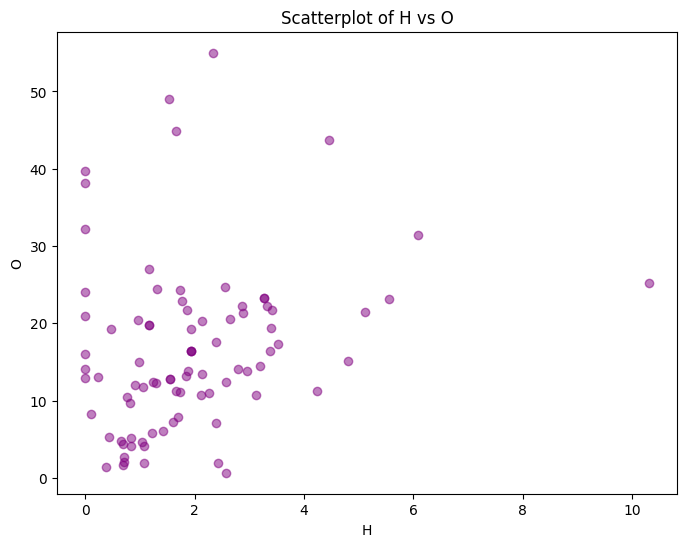

In [ ]:
#Plotting a scatter plot for two numeric columns
plt.figure(figsize=(8,6))
plt.scatter(df['H'], df['O'], alpha=0.5, color='purple')
plt.title('Scatterplot of H vs O')
plt.xlabel('H')
plt.ylabel('O')
plt.show()

<ipython-input-86-4fa537a77e28>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Biomass', y='C', data=df, palette='muted')


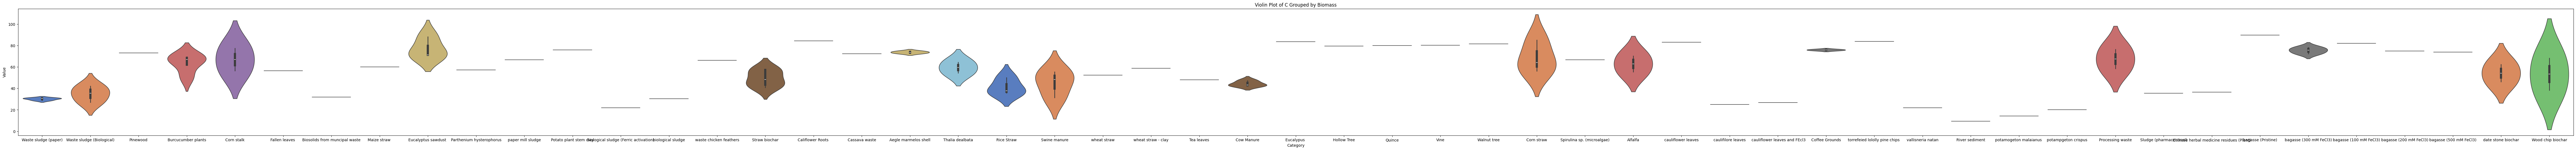

In [ ]:
#Plotting a violin plot for a specific numeric column grouped by a categorical column
plt.figure(figsize=(120,6))
sns.violinplot(x='Biomass', y='C', data=df, palette='muted')
plt.title('Violin Plot of C Grouped by Biomass')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

In [ ]:
#Example of an if statement
number = 25
if number > 0:
    print("The number is positive.")
elif number < 0:
  print("The number is negative.")
else: print("The number is zero.")

The number is positive.
